In [ ]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.1 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 60.3 MB/s eta 0:00:00


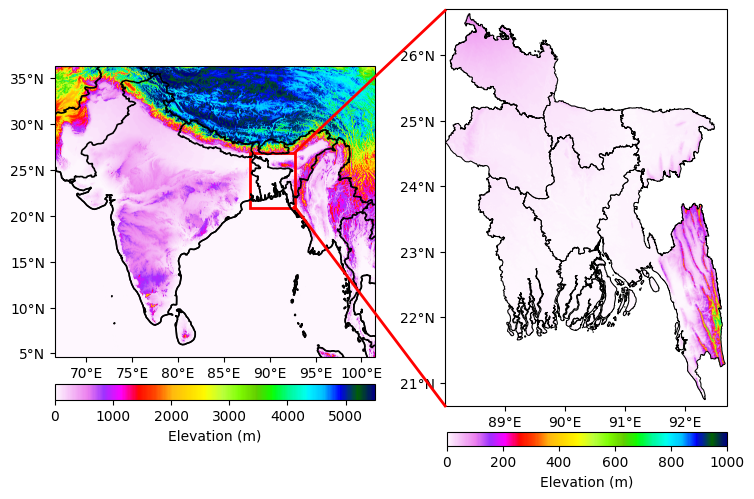

In [ ]:
import rasterio
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from rasterio.plot import show
import geopandas as gpd
from cartopy.io.shapereader import natural_earth
from shapely.geometry import Point
from shapely.prepared import prep
from rasterio.mask import mask
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

# Load the Bangladesh boundary
states = gpd.read_file('/content/drive/MyDrive/AP_HW/Scripts-ll/study_area/gadm41_BGD_shp/gadm41_BGD_0.shp')
bangladesh = states[states['COUNTRY'] == 'Bangladesh']

# Open the TIFF file
tiff_path = "/content/drive/MyDrive/AP_HW/Scripts-ll/study_area/etopo2022.tiff"
with rasterio.open(tiff_path) as src:
    # Subcontinet
    sub_data = src.read(1)  # Read the first band
    sub_transform = src.transform  # Get affine transform
    sub_extent = [sub_transform[2], sub_transform[2] + sub_transform[0] * src.width,
              sub_transform[5] + sub_transform[4] * src.height, sub_transform[5]]  # Get spatial extent
    # BD
    bangladesh = bangladesh.to_crs(src.crs)
    # Mask the raster
    bd_image, bd_transform = mask(src, bangladesh.geometry, crop=True)
    # Replace 0 values with NaN
    bd_image = np.where(bd_image == 0, np.nan, bd_image)
    # Correcting bd_extent definition:
    bd_extent = [
        bd_transform[2],  # min X (longitude)
        bd_transform[2] + bd_transform[0] * bd_image.shape[2],  # max X (longitude)
        bd_transform[5] + bd_transform[4] * bd_image.shape[1],  # min Y (latitude)
        bd_transform[5]  # max Y (latitude)
    ]


# Create figure and axis
fig, axes = plt.subplots(1,2,figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Show raster data
ax=axes[0]
img = ax.imshow(sub_data, cmap='gist_ncar_r', extent=sub_extent,vmin=-0,vmax=5500, origin='upper')
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.03, pad=0.02)
cbar.set_label("Elevation (m)")
cbar.ax.set_position([0.06, -0.515, 0.4, 0.7])

# Add coastlines and title
ax.coastlines()
# ax.gridlines(draw_labels=['left','bottom'],visible=False)
ax.coastlines(linewidths=1.2)
ax.add_feature(cf.BORDERS.with_scale('10m'),linewidths=1.2)
ax.add_feature(cf.LAND)
ax.set_position([0.06, 0.23, 0.4, 0.7])
ax.yaxis.tick_left()
ax.set_xticks(np.arange(70,101,5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(5,36,5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Add box
box_coords = [87.8, 20.9, 5, 6]  #[xmin, ymin, width, height]
rect = patches.Rectangle((box_coords[0], box_coords[1]), box_coords[2], box_coords[3],
                         linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Add  Line
line = mlines.Line2D([0.36, 0.548], [0.57, 0.807], color='red', linestyle='-', linewidth=2)
fig.add_artist(line)
line_2 = mlines.Line2D([0.36, 0.548], [0.48, 0.148], color='red', linestyle='-', linewidth=2)
fig.add_artist(line_2)

# Show raster data
ax=axes[1]
img = ax.imshow(bd_image[0], cmap='gist_ncar_r', extent=bd_extent,vmin=-0,vmax=1000, origin='upper')
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.03, pad=0.02)
cbar.set_label("Elevation (m)")
cbar.ax.set_position([0.55, -0.4, 0.35, 0.505])

# === Add div Borders ===
states = gpd.read_file('/content/drive/MyDrive/AP_HW/Scripts-ll/study_area/gadm41_BGD_shp/gadm41_BGD_1.shp')
bd_divs = states[states['COUNTRY'] == 'Bangladesh']
bd_divs = bd_divs.to_crs(src.crs)
bd_divs.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)


ax.set_extent([88,92.7,20.65,26.7])
ax.yaxis.tick_left()
ax.set_xticks([89,90, 91, 92], crs=ccrs.PlateCarree())
ax.set_yticks([21, 22, 23, 24, 25, 26], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.show()


# fig.savefig(f'/content/drive/MyDrive/AP_HW/Results/study_area/BD_with_topography.png', dpi=300, bbox_inches='tight')